# Importing Data in Python (Part 1)

As a Data Scientist, on a daily basis you will need to clean data, wrangle and munge it, visualize it, build predictive models and interpret these models. Before doing any of these, however, you will need to know how to get data into Python. In this course, you'll learn the many ways to import data into Python: (i) from flat files such as .txts and .csvs; (ii) from files native to other software such as Excel spreadsheets, Stata, SAS and MATLAB files; (iii) from relational databases such as SQLite & PostgreSQL.

## Import Data From Plain Text
To check out any plain text file, you can use the Python's open() function to open a connection to the file.
```python
#assign the file name to the variable string
file_name = 'file_name.txt'
#pass the file name to the open function using 'r' mode 
file = open(file_name, mode='r')# only for reading
#to connection to the file apply the read() function
text =file.read()
#close the connection
file.close()

```
By using a context manager construct that allows us to create a context in which you can execute commands with the file open. We can avoid having to close to connection to the file using the 'with' statement. For the large files, we may want to print a few lines. You can use 'file.readline()' function to execute the first line of a text file. If you execute the same comment again, the second line will be printing and so on.
```python
#By using the with open we don't need to close the connection.
with open(file_name, 'r') as file:
     print(file.read())
#print out the file line by line executing with file.readline()
with open(file_name, 'r') as file:
     print(file.readline())
     print(file.readline())
     print(file.readline())
```
## Import data from Flat File

Flat files are basic text file  containing records, that is table data, without structured relationships.

It is also essential to know flat files can have a header such as in’titanic.csv’, which is row that occurs as the first row and describes the content of data columns or states what the corresponding attributes  or features in each column are.
### importing flat file uisng Numpy
We're now going to load the MNIST digit recognition dataset using the numpy function `loadtxt()` and see just how easy it can be:
* The first argument will be the `filename`.
* The second will be the `delimiter` which can take `','` for comma separated file and `'t'` for tab-delimated file
* `skiprows` allows you to specify how many rows you wish to skip.
* `usecols` takes a list of the indices of the columns you wish to keep.
* `dtype=’str’` will ensure that all entries are imported as strings.

In [7]:

import numpy as np
file_name = 'data/mnist_kaggle_some_rows.csv'
#Default delimeter is white space so, we need the specify delimeter parameter explicity.
data = np.loadtxt(file_name, delimiter=',')
#we are reading file as a numpy array
print(type(data))
print(data)

<class 'numpy.ndarray'>
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [2. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [5. 0. 0. ... 0. 0. 0.]]


**Importing different datatypes:** 
Let's imprt the text file which has
* text header, consisting of  string
* tab-delimated

We are going to use seaslug.txt file which the data consists of percentage of sea slug larvae that had metamorphosed in a given time period. 

Due to the file  containing `string` header we need to handle it. if we import the file uisng loadtxt() without handling string file we get the `ValueError` which is tell us `could not convert string to float`. We can hadle it in 2 way:

Alternative 1: We can set the `dtype =str` to avoid to ValueError,<br>
Alternative 2: We can skip the first row , using the skiprows argument!

In [28]:
#Alternative 1:
file_sea_slug = 'data/seaslug.txt'
data_alt_1 = np.loadtxt(file_sea_slug, delimiter='\t', dtype=str)
print(type(data_alt_1))
print(data_alt_1[0:5])

<class 'numpy.ndarray'>
[['Time' 'Percent']
 ['99' '0.067']
 ['99' '0.133']
 ['99' '0.067']
 ['99' '0']]


In [26]:
#Alternative 2:
data_alt_2 = np.loadtxt(file_sea_slug, delimiter='\t', skiprows=1)
print(type(data_alt_2))
print(data_alt_2[0:9])

<class 'numpy.ndarray'>
[[9.90e+01 6.70e-02]
 [9.90e+01 1.33e-01]
 [9.90e+01 6.70e-02]
 [9.90e+01 0.00e+00]
 [9.90e+01 0.00e+00]
 [0.00e+00 5.00e-01]
 [0.00e+00 4.67e-01]
 [0.00e+00 8.57e-01]
 [0.00e+00 5.00e-01]]


To import datasets which have different datatypes in different columns;for example, one column may contain strings and another floats. The function `np.loadtxt()` will freak at this. There is another function, `np.genfromtxt()`, which can handle such structures. If we pass `dtype=None` to it, it will figure out what types each column should be.
```python
data = np.genfromtxt(file_name, delimiter=',', names=True, dtype=None)
```
* The first argument is the filename
* the second specifies the delimiter
* The third argument names tells us there is a header (names=True)
* dtype=None is represent the different data type

*There is also another function `np.recfromcsv()`that behaves similarly to np.genfromtxt(), except that its default dtype is None!*

In [41]:
# Let's look at titanic.csv 
# ',', comma separated
# there is header
# there are string and number data type in it.
titanic = np.genfromtxt('data/titanic_sub.csv', delimiter=',', names=True, dtype=None)
print(titanic[0:2])

[(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171',  7.25  , b'', b'S')
 (2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C')]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """


In [37]:
# using np.recfromcsv()
titanic_2 = np.recfromcsv('data/titanic_sub.csv')
print(titanic_2[0:5])

[(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171',  7.25  , b'', b'S')
 (2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C')
 (3, 1, 3, b'female', 26., 0, 0, b'STON/O2. 3101282',  7.925 , b'', b'S')
 (4, 1, 1, b'female', 35., 1, 0, b'113803', 53.1   , b'C123', b'S')
 (5, 0, 3, b'male', 35., 0, 0, b'373450',  8.05  , b'', b'S')]


/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:2278: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


## Importing flat files using pandas

What we learn so far is to import a bunch of different types of flat files into python as Numpy arrays. Although the numpy array is incredibly useful and has numerous of purpose, they can not handle the data as two dimensional labeled data structure.
Pandas offer us to the DataFrame, which has observations (rows), and variables(columns).

In [42]:
import pandas as pd

In [46]:
df_titanic = pd.read_csv('data/titanic_sub.csv')

print(type(df_titanic))
df_titanic.head()

<class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


Handling read_csv() function under different circumstances 
* `sep:` Stands for a separator, a default is ',' as in .csv(comma separated values): We could specify if needed.
*` header= None:` Load a CSV with no headers
* `names=['column_name1','column_name2']:` Load a .csv while specifying column names
* `index_col='date':` Load a .csv with setting the index column to column name like we would like set index as a date.
* `na_values=['NA']:` Load a .csv while specifying "NA" as missing values.
* `skiprows=3:` Load a .csv while skipping the top 3 rows

**Pickle file**: <br>
**Warning Loading pickled data received from untrusted sources can be unsafe**
Let's create the pickle file and then load it.

In [50]:
#import pickle
import pickle
#Let's save the titanic data frame into picle file
pd.to_pickle(df_titanic, 'data/titanic_pickle.pkl')

In [54]:
#first try with with open
with open ('data/titanic_pickle.pkl','rb') as file:
    data = pickle.load(file)
#reading the data type as DataFrame
print(type(data))
print(data[0:3])

<class 'pandas.core.frame.DataFrame'>
   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  


In [55]:
#Let's read with pandas
unpickled_df = pd.read_pickle('data/titanic_pickle.pkl')
unpickled_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


**Excel File:** 
You may need to deal with excel file at some point. Here, you'll learn how to use pandas to import Excel spreadsheets. 
* Use the pandas's ExcelFile to load the .xlsx  file 
* Figure out the what is the sheets name using `.sheet_names`
* we could load the particular sheets into a dataframe, we need to apply a parse() method with a single parameter, which is either the name of string or the index as a float of the sheets that you wish to load.



In [56]:
 excel_data = pd.ExcelFile('data/battledeath.xlsx')
 print(excel_data.sheet_names)

['2002', '2004']


In [57]:
#Load the sheet into dataframe 
df1 = excel_data.parse('2004')
print(df1.head())

  War(country)      2004
0  Afghanistan  9.451028
1      Albania  0.130354
2      Algeria  3.407277
3      Andorra  0.000000
4       Angola  2.597931


In [59]:
df2 = excel_data.parse('2002')
df2.head()

,"War, age-adjusted mortality due to",2002
0,Afghanistan,36.083990
1,Albania,0.128908
2,Algeria,18.314120
3,Andorra,0.000000
4,Angola,18.964560


In [74]:
excel_df = pd.read_excel('data/battledeath.xlsx', index_col=0, sheet_name='2004')
excel_df.head()

,2004
War(country),
Afghanistan,9.451028
Albania,0.130354
Algeria,3.407277
Andorra,0.000000
Angola,2.597931


**SAS File:** Statistical analysis System
* Business analysis and biostatistics
* Advanced analysis, Multivariable analysis
* Data management
* Predictive analytics
* sas7bdat: dataset files & sas7cdat: catalog file

In [83]:
#pip install sas7bdat
# import the sas7bdat 
from sas7bdat import SAS7BDAT
with SAS7BDAT ('data/sales.sas7bdat') as file:
    df_sas = file.to_data_frame()
print(df_sas.head())

     YEAR     P           S
0  1950.0  12.9  181.899994
1  1951.0  11.9  245.000000
2  1952.0  10.7  250.199997
3  1953.0  11.3  265.899994
4  1954.0  11.2  248.500000


**Stata File: "Statistics" + "data"**
* Importing Stata files as DataFrames using the pd.read_stata()from pandas.
* Academic & social sciences research

In [85]:
df_stata = pd.read_stata('data/disarea.dta')
print(df_stata.head())

  wbcode               country  disa1  disa2  disa3  disa4  disa5  disa6  \
0    AFG           Afghanistan   0.00   0.00   0.76   0.73    0.0   0.00   
1    AGO                Angola   0.32   0.02   0.56   0.00    0.0   0.00   
2    ALB               Albania   0.00   0.00   0.02   0.00    0.0   0.00   
3    ARE  United Arab Emirates   0.00   0.00   0.00   0.00    0.0   0.00   
4    ARG             Argentina   0.00   0.24   0.24   0.00    0.0   0.23   

   disa7  disa8   ...    disa16  disa17  disa18  disa19  disa20  disa21  \
0   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.00     0.0   
1   0.56    0.0   ...       0.0     0.4     0.0    0.61    0.00     0.0   
2   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.00     0.0   
3   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.00     0.0   
4   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.05     0.0   

   disa22  disa23  disa24  disa25  
0    0.00    0.02    0.00    0.00  
1    0.99    0.98   

**HDF5: Hierarchcal Data Format version 5**
* Storing for large quantitie of numerical data
* Datasets can be  hundred of gigabytes, or terabytes

In [87]:
import h5py
df_h5py = h5py.File('data/L-L1_LOSC_4_V1-1126259446-32.hdf5', 'r')
print(type(df_h5py))
print(df_h5py)

<class 'h5py._hl.files.File'>


In [99]:
for key in df_h5py.keys():
    print(key)

meta
quality
strain


In [102]:
print(type(df_h5py['meta']))

<class 'h5py._hl.group.Group'>


In [103]:
for key in df_h5py['meta'].keys():
    print(key)

Description
DescriptionURL
Detector
Duration
GPSstart
Observatory
Type
UTCstart


In [105]:
print(df_h5py['meta']['Detector'].value)

b'L1'


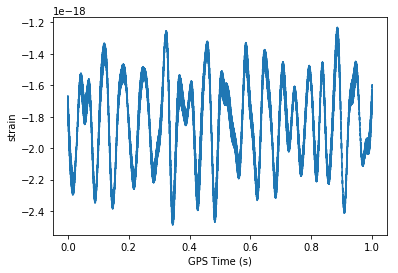

In [110]:
strain = df_h5py['strain']['Strain'].value
num_samples = 10000
time = np.arange(0,1, 1/num_samples)
import matplotlib.pyplot as plt
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()

MATLAB File: 
   * Industry standard in engineering and science
   * Data saved as .mat file
   * we are goint to figure out how to load a MATLAB file using `scipy.io.loadmat()` 
   * scipy.io.savemat() to write .mat file
   * type of the file will be the dictonary 
   * keys: Matlab variable names
   * value: object assigned to variables.

In [119]:
#Import the package scipy.io
import scipy.io

#load MATLAB file into df_mat
df_mat = scipy.io.loadmat('data/ja_data2.mat')
print(type(df_mat))
#print the keys of MATLAB dictionary
print(df_mat.keys())


<class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'rfpCyt', 'rfpNuc', 'cfpNuc', 'cfpCyt', 'yfpNuc', 'yfpCyt', 'CYratioCyt'])


In [116]:
print(df_mat['cfpNuc'])

[[  0.         844.75086505 874.15492958 ... 710.70382166 715.50154799
  727.59872611]
 [  0.         643.34878049 641.84020619 ... 583.27021277 603.84897959
  608.45679012]
 [  0.         487.2        486.08863198 ... 435.80705009 431.29063098
  439.29222011]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.         535.31235431 541.69194313 ...   0.           0.
    0.        ]
 [  0.         793.31832298   0.         ... 584.53435115 577.9835443
  599.96085859]]


In [118]:
print(np.shape(df_mat['cfpNuc']))

(200, 137)


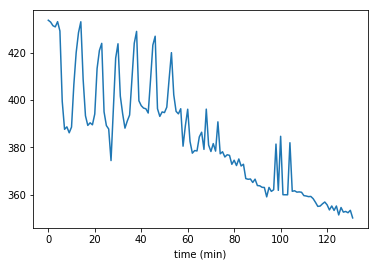

In [121]:
data = df_mat['cfpNuc'][25, 5:]
plt.xlabel('time (min)')
plt.plot(data)